In [1]:
# !sudo apt-get update
# !sudo apt-get install python3-rtree
# !sudo pip3 install -U geopandas descartes pandas matplotlib
# !sudo pip3 install -U shapely

In [2]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  307M    0  307M    0     0  2641k      0 --:--:--  0:01:59 --:--:-- 2801k183k      0 --:--:--  0:00:11 --:--:-- 2461k


In [4]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv("accidents.csv", low_memory=False, dtype='object')

In [5]:
!rm accidents.csv

In [6]:
df['DATETIME'] = df.DATE + ' ' + df.TIME
df.DATETIME = pd.to_datetime(df.DATETIME, format="%m/%d/%Y %H:%M")
#df.TIME = pd.to_datetime(df.TIME, format="%H:%M")
#df.DATE = pd.to_datetime(df.DATE, format="%m/%d/%Y")

In [7]:
df.dtypes

DATE                                     object
TIME                                     object
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                 object
LONGITUDE                                object
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED                object
NUMBER OF PERSONS KILLED                 object
NUMBER OF PEDESTRIANS INJURED            object
NUMBER OF PEDESTRIANS KILLED             object
NUMBER OF CYCLIST INJURED                object
NUMBER OF CYCLIST KILLED                 object
NUMBER OF MOTORIST INJURED               object
NUMBER OF MOTORIST KILLED                object
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [8]:
df.BOROUGH = pd.Categorical(df.BOROUGH)
df['ZIP CODE'] = pd.Categorical(df['ZIP CODE'])

In [9]:
df.LATITUDE = pd.to_numeric(df.LATITUDE)
df.LONGITUDE  = pd.to_numeric(df.LONGITUDE)

In [10]:
df.dtypes

DATE                                     object
TIME                                     object
BOROUGH                                category
ZIP CODE                               category
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED                object
NUMBER OF PERSONS KILLED                 object
NUMBER OF PEDESTRIANS INJURED            object
NUMBER OF PEDESTRIANS KILLED             object
NUMBER OF CYCLIST INJURED                object
NUMBER OF CYCLIST KILLED                 object
NUMBER OF MOTORIST INJURED               object
NUMBER OF MOTORIST KILLED                object
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [11]:
df['NUMBER OF PERSONS INJURED'].fillna(0, inplace=True)
df['NUMBER OF PERSONS INJURED'] = pd.to_numeric(df['NUMBER OF PERSONS INJURED'], downcast='unsigned')

In [12]:
df['NUMBER OF PERSONS KILLED'].fillna(0, inplace=True)
df['NUMBER OF PERSONS KILLED']  = pd.to_numeric(df['NUMBER OF PERSONS KILLED'], downcast='unsigned')

In [13]:
df['NUMBER OF PEDESTRIANS INJURED'] = pd.to_numeric(df['NUMBER OF PEDESTRIANS INJURED'], downcast='unsigned') 

In [14]:
df['NUMBER OF PEDESTRIANS KILLED']  = pd.to_numeric(df['NUMBER OF PEDESTRIANS KILLED'], downcast='unsigned')

In [15]:
df['NUMBER OF CYCLIST INJURED']  = pd.to_numeric(df['NUMBER OF CYCLIST INJURED'], downcast='unsigned')
df['NUMBER OF CYCLIST KILLED']  = pd.to_numeric(df['NUMBER OF CYCLIST KILLED'] , downcast='unsigned')
df['NUMBER OF MOTORIST INJURED'] = pd.to_numeric(df['NUMBER OF MOTORIST INJURED'] , downcast='unsigned')
df['NUMBER OF MOTORIST KILLED']  = pd.to_numeric(df['NUMBER OF MOTORIST KILLED'], downcast='unsigned')

In [16]:
df.head(5)

DATE  TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  03/15/2019  0:00      BRONX    10455  40.813620 -73.910960   
1  03/15/2019  0:00      BRONX    10455  40.818993 -73.909744   
2  03/15/2019  0:00  MANHATTAN    10019        NaN        NaN   
3  03/15/2019  0:00     QUEENS    11427  40.738900 -73.733780   
4  03/15/2019  0:00        NaN      NaN        NaN        NaN   

                  LOCATION                    ON STREET NAME  \
0    (40.81362, -73.91096)  EAST 149 STREET                    
1  (40.818993, -73.909744)  EAST 156 STREET                    
2                      NaN  WEST 56 STREET                     
3     (40.7389, -73.73378)  UNION TURNPIKE                     
4                      NaN  WEBSTER                            

      CROSS STREET NAME OFF STREET NAME    ...      \
0      CAULDWELL AVENUE             NaN    ...       
1          EAGLE AVENUE             NaN    ...       
2             12 AVENUE             NaN    ...       
3  WINCHESTER BOULEVARD             NaN    ...       
4       EAST 167 STREET             NaN    ...       

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  UNIQUE KEY  \
0                            NaN     4097692   
1                            NaN     4098536   
2                            NaN     4098363   
3                            NaN     4097353   
4                            NaN     4098099   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Sedan                                Sedan   
1  Station Wagon/Sport Utility Vehicle                            Box Truck   
2  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
3  Station Wagon/Sport Utility Vehicle                                Sedan   
4  Station Wagon/Sport Utility Vehicle                                  NaN   

   VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5   DATETIME  
0                  NaN                  NaN                 NaN 2019-03-15  
1                  NaN                  NaN                 NaN 2019-03-15  
2                  NaN                  NaN                 NaN 2019-03-15  
3                  NaN                  NaN                 NaN 2019-03-15  
4                  NaN                  NaN                 NaN 2019-03-15  

[5 rows x 30 columns]

In [17]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = pd.Categorical(df['CONTRIBUTING FACTOR VEHICLE 1'].str.upper())
df['CONTRIBUTING FACTOR VEHICLE 2'] = pd.Categorical(df['CONTRIBUTING FACTOR VEHICLE 2'].str.upper())
df['CONTRIBUTING FACTOR VEHICLE 3'] = pd.Categorical(df['CONTRIBUTING FACTOR VEHICLE 3'].str.upper())
df['CONTRIBUTING FACTOR VEHICLE 4'] = pd.Categorical(df['CONTRIBUTING FACTOR VEHICLE 4'].str.upper())
df['CONTRIBUTING FACTOR VEHICLE 5'] = pd.Categorical(df['CONTRIBUTING FACTOR VEHICLE 5'].str.upper())
df['VEHICLE TYPE CODE 1'] = pd.Categorical(df['VEHICLE TYPE CODE 1'].str.upper())
df['VEHICLE TYPE CODE 2'] = pd.Categorical(df['VEHICLE TYPE CODE 2'].str.upper())
df['VEHICLE TYPE CODE 3'] = pd.Categorical(df['VEHICLE TYPE CODE 3'].str.upper())
df['VEHICLE TYPE CODE 4'] = pd.Categorical(df['VEHICLE TYPE CODE 4'].str.upper())
df['VEHICLE TYPE CODE 5'] = pd.Categorical(df['VEHICLE TYPE CODE 5'].str.upper())

In [18]:
len(df)

1461536

In [19]:
# Drop the accidents with NULL coordinates.
df = df[~(df.LATITUDE.isnull()) & ~(df.LONGITUDE.isnull())]

In [20]:
len(df)

1277138

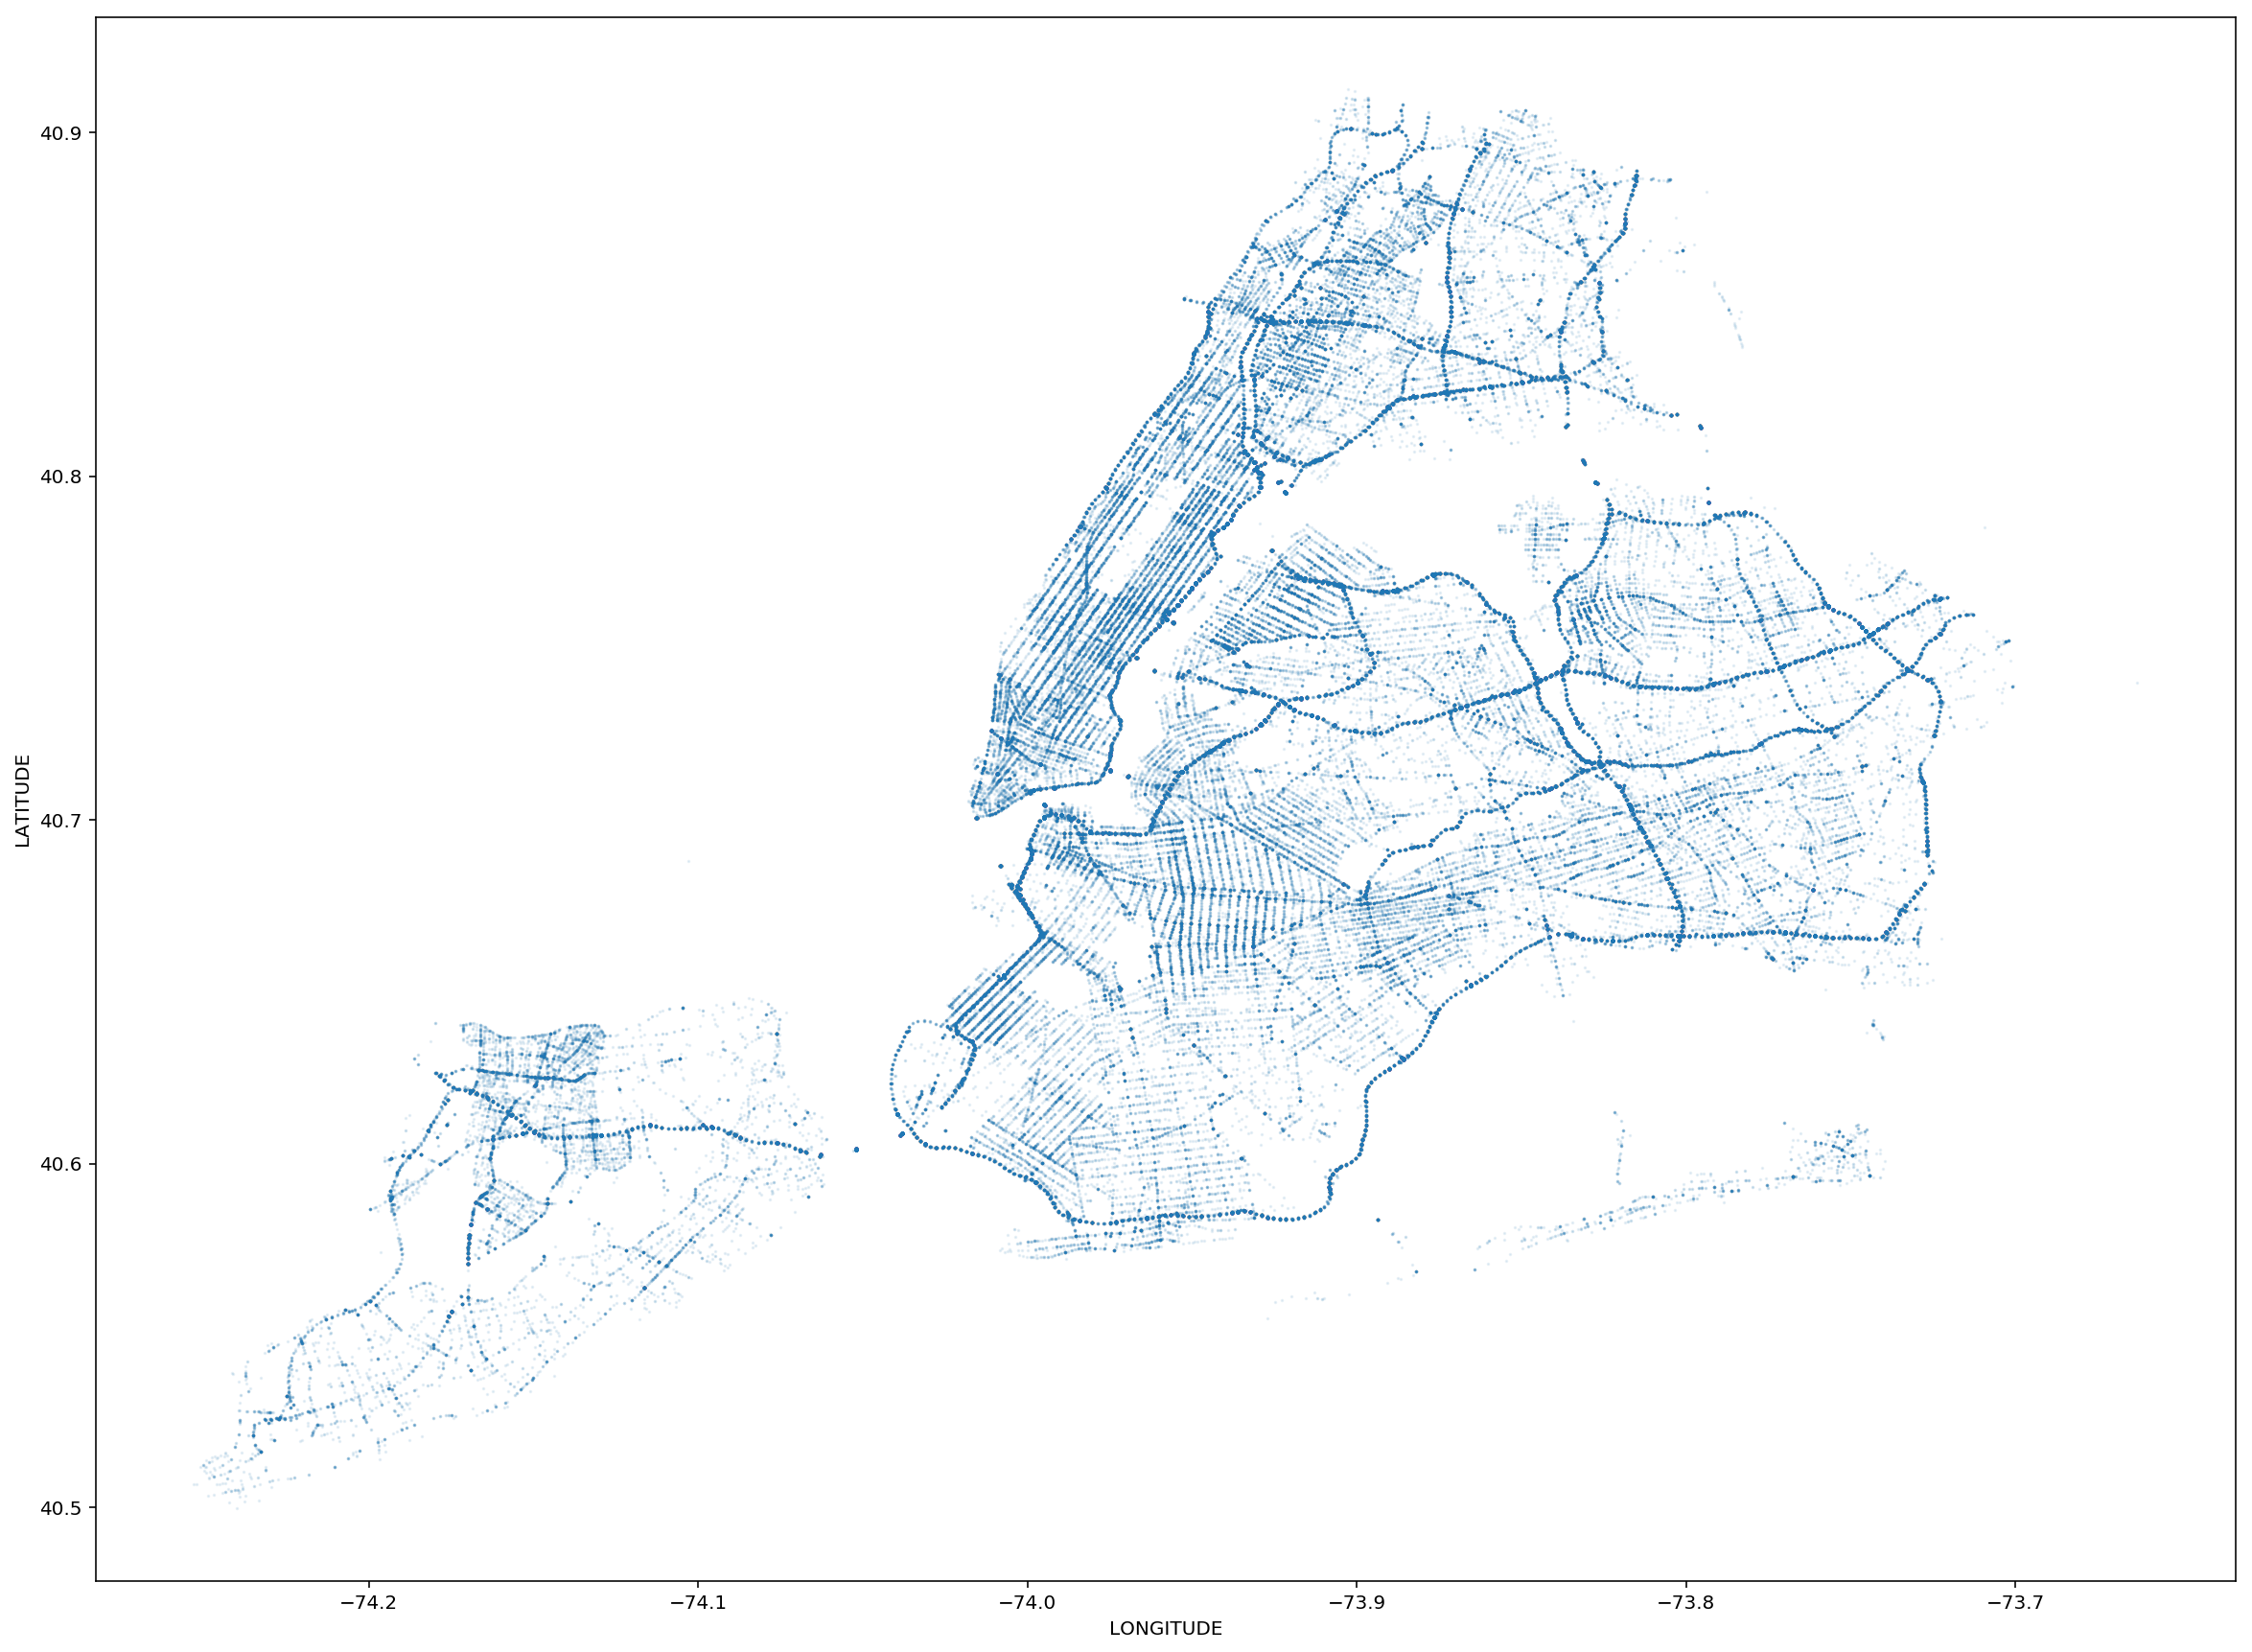

In [21]:
# A map of all the accidents where the BOROUGH is NULL
# Not clear why, but there is a strong bias for highway collissions
# not to have the BOROUGH set. We will fix that later on by using
# the BORO_NAME attribute from the spatial join with the NYC shapefile

# The 'mask' sets rough bound box limits for NYC
mask = (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5)

df[ df.BOROUGH.isnull() & mask ].plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(20, 15),
    s=0.5,
    alpha=0.1)

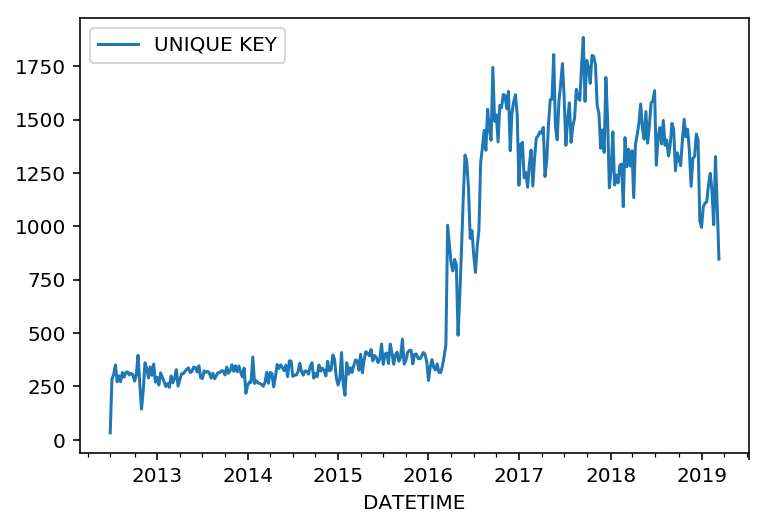

In [22]:
# Check if there is a temporal pattern in the errors

df[ df.BOROUGH.isnull() & mask ].pivot_table(
    index='DATETIME',
    values='UNIQUE KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [23]:
# We will now perform a spatial join with the NYC shapefile 
# to find the neighborhood for each accident, and also filter out
# automatically all the accidents that have incorrect coordinates
# and/or incorrect BOROUGH listed

In [24]:
# We start by converting the LON/LAT attributes into Shapely "geo-points"
# and convert the resut into a geodataframe so that we can do a spatial join 
from shapely.geometry import Point
df['Coordinates'] = list(zip(df.LONGITUDE, df.LATITUDE))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

In [25]:
shapefile_url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
df_nyc = gpd.GeoDataFrame.from_file(shapefile_url)

In [26]:
%%time
# Match each accident with a neighborhood. 
# Using inner join, so points outside neighborhoods are dropped out
# Takes ~ 1-2 mins to run
gdf = gpd.sjoin(df_nyc, gdf)

/usr/local/lib/python3.6/dist-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


CPU times: user 1min 14s, sys: 12.3 s, total: 1min 26s
Wall time: 1min 26s


In [27]:
len(gdf)

1268456

In [28]:
not_matching = set(df['UNIQUE KEY'].values) - set(gdf['UNIQUE KEY'].values)

In [29]:
len(not_matching)

8682

In [30]:
# These are the entries that we could filter out with a simple mask
nm1 = df[ df['UNIQUE KEY'].isin(not_matching) & ~mask ]
nm1.head()

DATE   TIME    BOROUGH ZIP CODE  LATITUDE  LONGITUDE    LOCATION  \
5422  03/06/2019   6:00  MANHATTAN    10018       0.0        0.0  (0.0, 0.0)   
5431  03/06/2019   6:55   BROOKLYN    11207       0.0        0.0  (0.0, 0.0)   
5433  03/06/2019   7:00     QUEENS    11426       0.0        0.0  (0.0, 0.0)   
5801  03/05/2019  15:15  MANHATTAN    10032       0.0        0.0  (0.0, 0.0)   
9655  02/27/2019   4:35   BROOKLYN    11216       0.0        0.0  (0.0, 0.0)   

                        ON STREET NAME CROSS STREET NAME OFF STREET NAME  \
5422  WEST 41 STREET                         DYER AVENUE             NaN   
5431  LIBERTY AVENUE                     HINSDALE STREET             NaN   
5433  JAMAICA AVENUE                           91 AVENUE             NaN   
5801  WEST 158 STREET                           BROADWAY             NaN   
9655  BEDFORD AVENUE                      PACIFIC STREET             NaN   

         ...       CONTRIBUTING FACTOR VEHICLE 4  \
5422     ...                                 NaN   
5431     ...                                 NaN   
5433     ...                                 NaN   
5801     ...                                 NaN   
9655     ...                                 NaN   

      CONTRIBUTING FACTOR VEHICLE 5  UNIQUE KEY  \
5422                            NaN     4092105   
5431                            NaN     4091877   
5433                            NaN     4092417   
5801                            NaN     4092488   
9655                            NaN     4088633   

                      VEHICLE TYPE CODE 1  \
5422                                SEDAN   
5431  STATION WAGON/SPORT UTILITY VEHICLE   
5433  STATION WAGON/SPORT UTILITY VEHICLE   
5801  STATION WAGON/SPORT UTILITY VEHICLE   
9655  STATION WAGON/SPORT UTILITY VEHICLE   

                      VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  \
5422                                  NaN                  NaN   
5431                                  NaN                  NaN   
5433                                SEDAN                  NaN   
5801                                  NaN                  NaN   
9655  STATION WAGON/SPORT UTILITY VEHICLE                  NaN   

      VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5            DATETIME  \
5422                  NaN                  NaN 2019-03-06 06:00:00   
5431                  NaN                  NaN 2019-03-06 06:55:00   
5433                  NaN                  NaN 2019-03-06 07:00:00   
5801                  NaN                  NaN 2019-03-05 15:15:00   
9655                  NaN                  NaN 2019-02-27 04:35:00   

      Coordinates  
5422  POINT (0 0)  
5431  POINT (0 0)  
5433  POINT (0 0)  
5801  POINT (0 0)  
9655  POINT (0 0)  

[5 rows x 31 columns]

In [31]:
nm1.LOCATION.value_counts()

(0.0, 0.0)                 921
(40.75837, -201.23706)     105
(40.665226, -32.768513)     16
(40.5606, -74.742)           7
(41.12615, -73.71353)        5
(40.556175, -47.209625)      3
(41.061634, -73.97066)       2
(41.34796, -73.96965)        1
(30.78418, -89.13527)        1
(42.64154, -79.00183)        1
(41.258785, -73.99024)       1
(42.107204, -76.02163)       1
(40.854286, -201.35999)      1
(41.12421, -73.71412)        1
(41.91661, -79.61955)        1
(34.783634, -86.76847)       1
(42.318317, -73.755936)      1
(43.344444, -76.2634)        1
Name: LOCATION, dtype: int64

In [32]:
# These are the entries that are not matching with a neighborhood
# but are within the NYC boundaries.
nm2 = df[ df['UNIQUE KEY'].isin(not_matching) & mask ]
nm2.head()

DATE   TIME BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
391   03/15/2019  20:15     NaN      NaN  40.757668  -73.95915   
1249  03/13/2019  13:30     NaN      NaN  40.851190  -73.95056   
1402  03/13/2019  17:20     NaN      NaN  40.755222  -73.96135   
2398  03/11/2019  14:15     NaN      NaN  40.756367  -73.96012   
2471  03/11/2019  16:00     NaN      NaN  40.845436  -73.92857   

                    LOCATION                    ON STREET NAME  \
391   (40.757668, -73.95915)  FDR DRIVE                          
1249   (40.85119, -73.95056)  CROSS BRONX EXPY                   
1402  (40.755222, -73.96135)  FDR DRIVE                          
2398  (40.756367, -73.96012)  FDR DRIVE                          
2471  (40.845436, -73.92857)  CROSS BRONX EXPY                   

     CROSS STREET NAME OFF STREET NAME                  ...                   \
391                NaN             NaN                  ...                    
1249               NaN             NaN                  ...                    
1402               NaN             NaN                  ...                    
2398               NaN             NaN                  ...                    
2471               NaN             NaN                  ...                    

      CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
391                             NaN                            NaN   
1249                            NaN                            NaN   
1402                            NaN                            NaN   
2398                            NaN                            NaN   
2471                            NaN                            NaN   

      UNIQUE KEY                  VEHICLE TYPE CODE 1  \
391      4097428  STATION WAGON/SPORT UTILITY VEHICLE   
1249     4097018                 TRACTOR TRUCK DIESEL   
1402     4096531                                 TAXI   
2398     4095620                                SEDAN   
2471     4096178                  TOW TRUCK / WRECKER   

                      VEHICLE TYPE CODE 2  \
391                                 SEDAN   
1249                                  NaN   
1402  STATION WAGON/SPORT UTILITY VEHICLE   
2398                                SEDAN   
2471                                SEDAN   

                      VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4  \
391   STATION WAGON/SPORT UTILITY VEHICLE                  NaN   
1249                                  NaN                  NaN   
1402                                  NaN                  NaN   
2398                                  NaN                  NaN   
2471                                  NaN                  NaN   

      VEHICLE TYPE CODE 5            DATETIME  \
391                   NaN 2019-03-15 20:15:00   
1249                  NaN 2019-03-13 13:30:00   
1402                  NaN 2019-03-13 17:20:00   
2398                  NaN 2019-03-11 14:15:00   
2471                  NaN 2019-03-11 16:00:00   

                               Coordinates  
391   POINT (-73.95914999999999 40.757668)  
1249            POINT (-73.95056 40.85119)  
1402           POINT (-73.96135 40.755222)  
2398  POINT (-73.96011999999999 40.756367)  
2471  POINT (-73.92856999999999 40.845436)  

[5 rows x 31 columns]

In [33]:
nm2.LOCATION.value_counts().head(10)

(40.608757, -74.038086)     670
(40.798256, -73.82744)      462
(40.604153, -74.05198)      440
(40.704422, -73.99491)      382
(40.604313, -74.05208)      161
(40.75834, -73.95775)       141
(40.727873, -73.9291223)    139
(40.714527, -73.97481)      138
(40.608364, -74.038666)     131
(40.704388, -73.994576)     130
Name: LOCATION, dtype: int64

In [34]:
nm2['ON STREET NAME'].value_counts().head(10)

VERRAZANO BRIDGE UPPER              859
BRONX WHITESTONE BRIDGE             774
BROOKLYN BRIDGE                     606
VERRAZANO BRIDGE LOWER              355
THROGS NECK BRIDGE                  344
WILLIAMSBURG BRIDGE OUTER ROADWA    316
BROOKLYN BATTERY TUNNEL             311
QUEENS MIDTOWN TUNNEL               310
TRIBOROUGH BRIDGE                   222
WILLIAMSBURG BRIDGE INNER ROADWA    191
Name: ON STREET NAME, dtype: int64

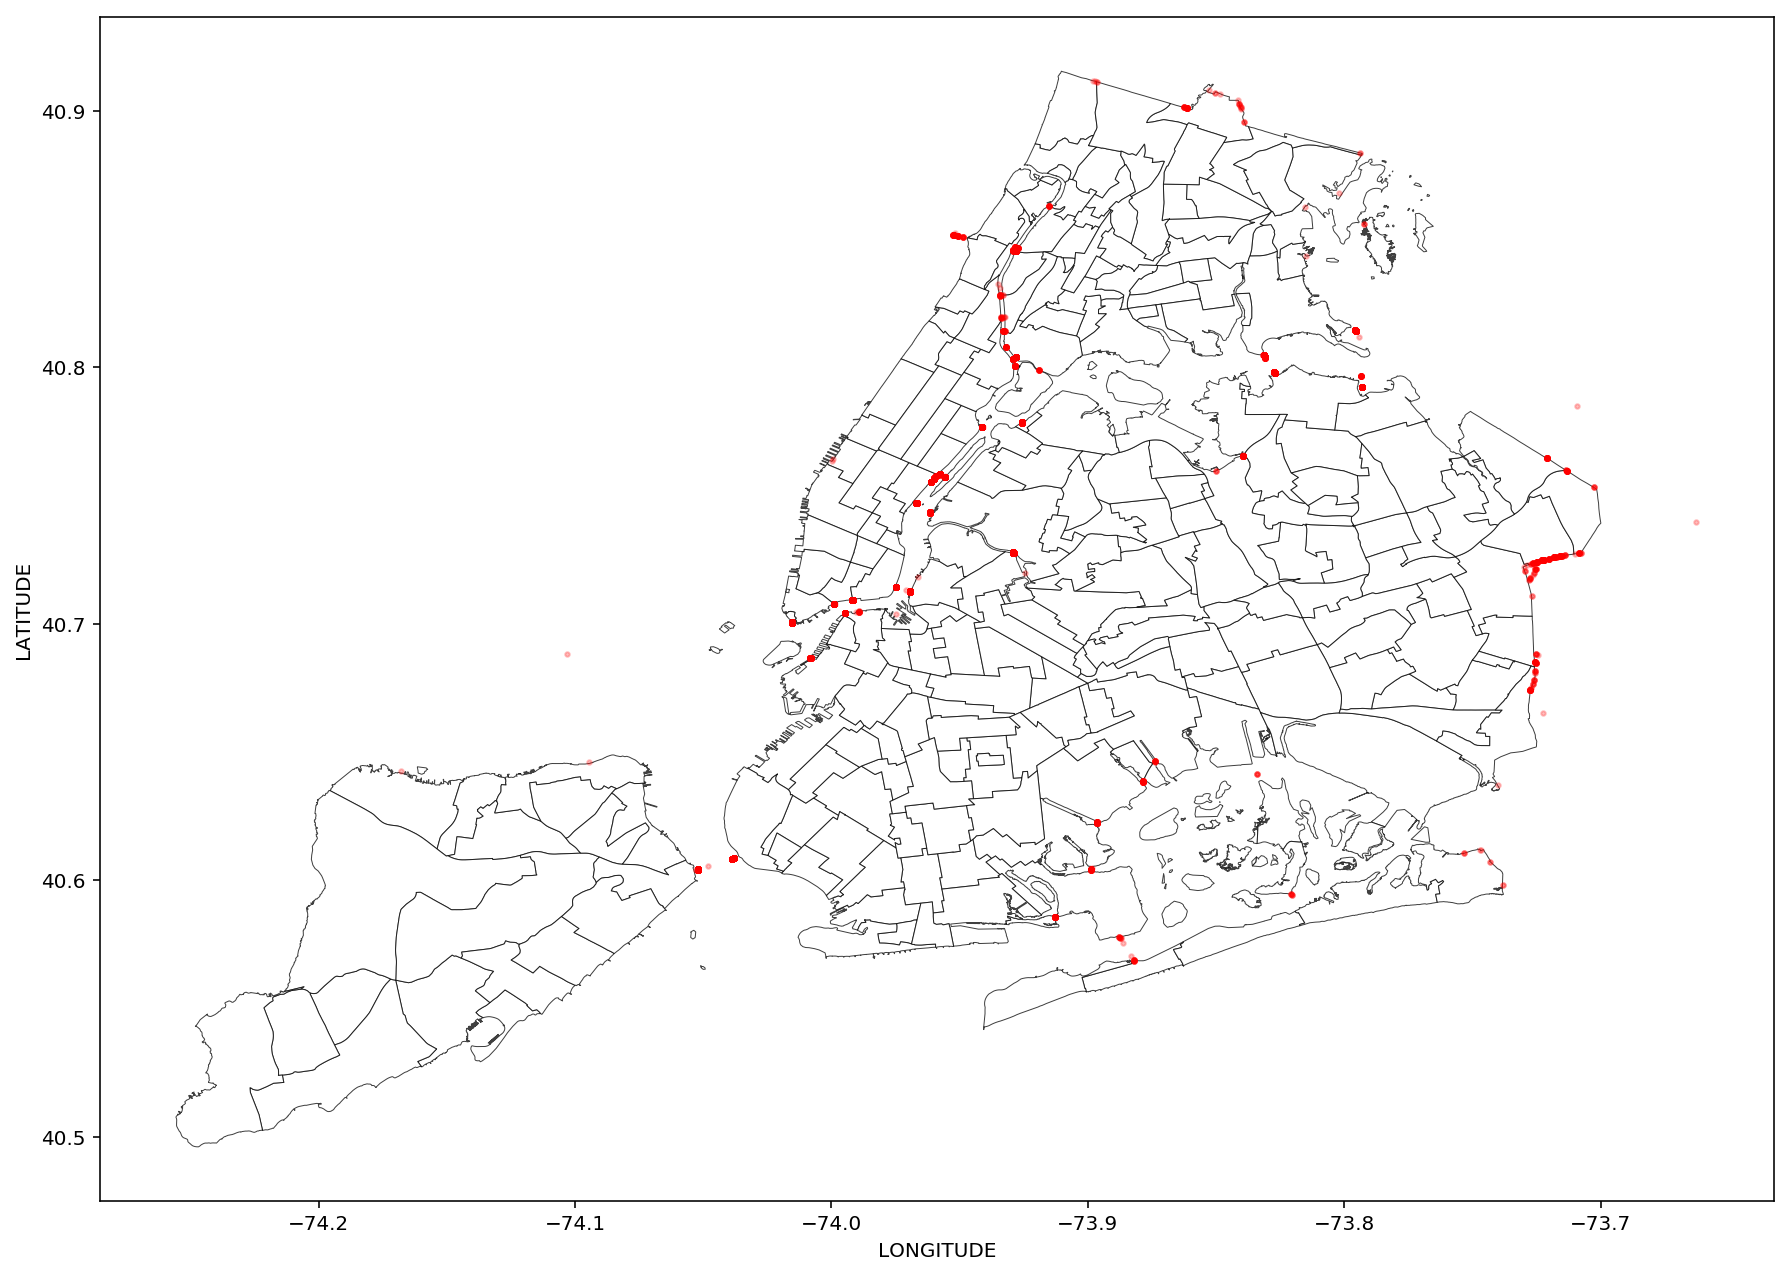

In [35]:
# The plot reveals that these are all bridge accidents
#
# Perhaps we may want to keep them in later versions
#
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 12),
    alpha=0.75)

df[ df['UNIQUE KEY'].isin(not_matching) & mask ].plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=5,
    alpha=0.25, ax=base)

In [36]:
# Code below lists cases where the borough is incorrectly coded based on lon/lat
# TODO: Perhaps also check cases where zipcode is incorrectly coded
errors = gdf [ ~gdf.BOROUGH.isnull() & (gdf.boro_name.str.lower() != gdf.BOROUGH.str.lower()) ]
errors = pd.DataFrame(errors)

In [37]:
len(errors)

1691

In [38]:
errors.LOCATION.value_counts().head(10)

(40.7136, -74.0091)          92
(40.8756831, -73.9083783)    58
(40.7244, -73.9818)          51
(40.7339, -73.9542)          46
(40.8772207, -73.9090451)    32
(40.873642, -73.90797)       30
(40.699531, -73.9110367)     28
(40.87564, -73.90836)        24
(40.6999378, -73.9118079)    19
(40.7043114, -73.9132917)    17
Name: LOCATION, dtype: int64

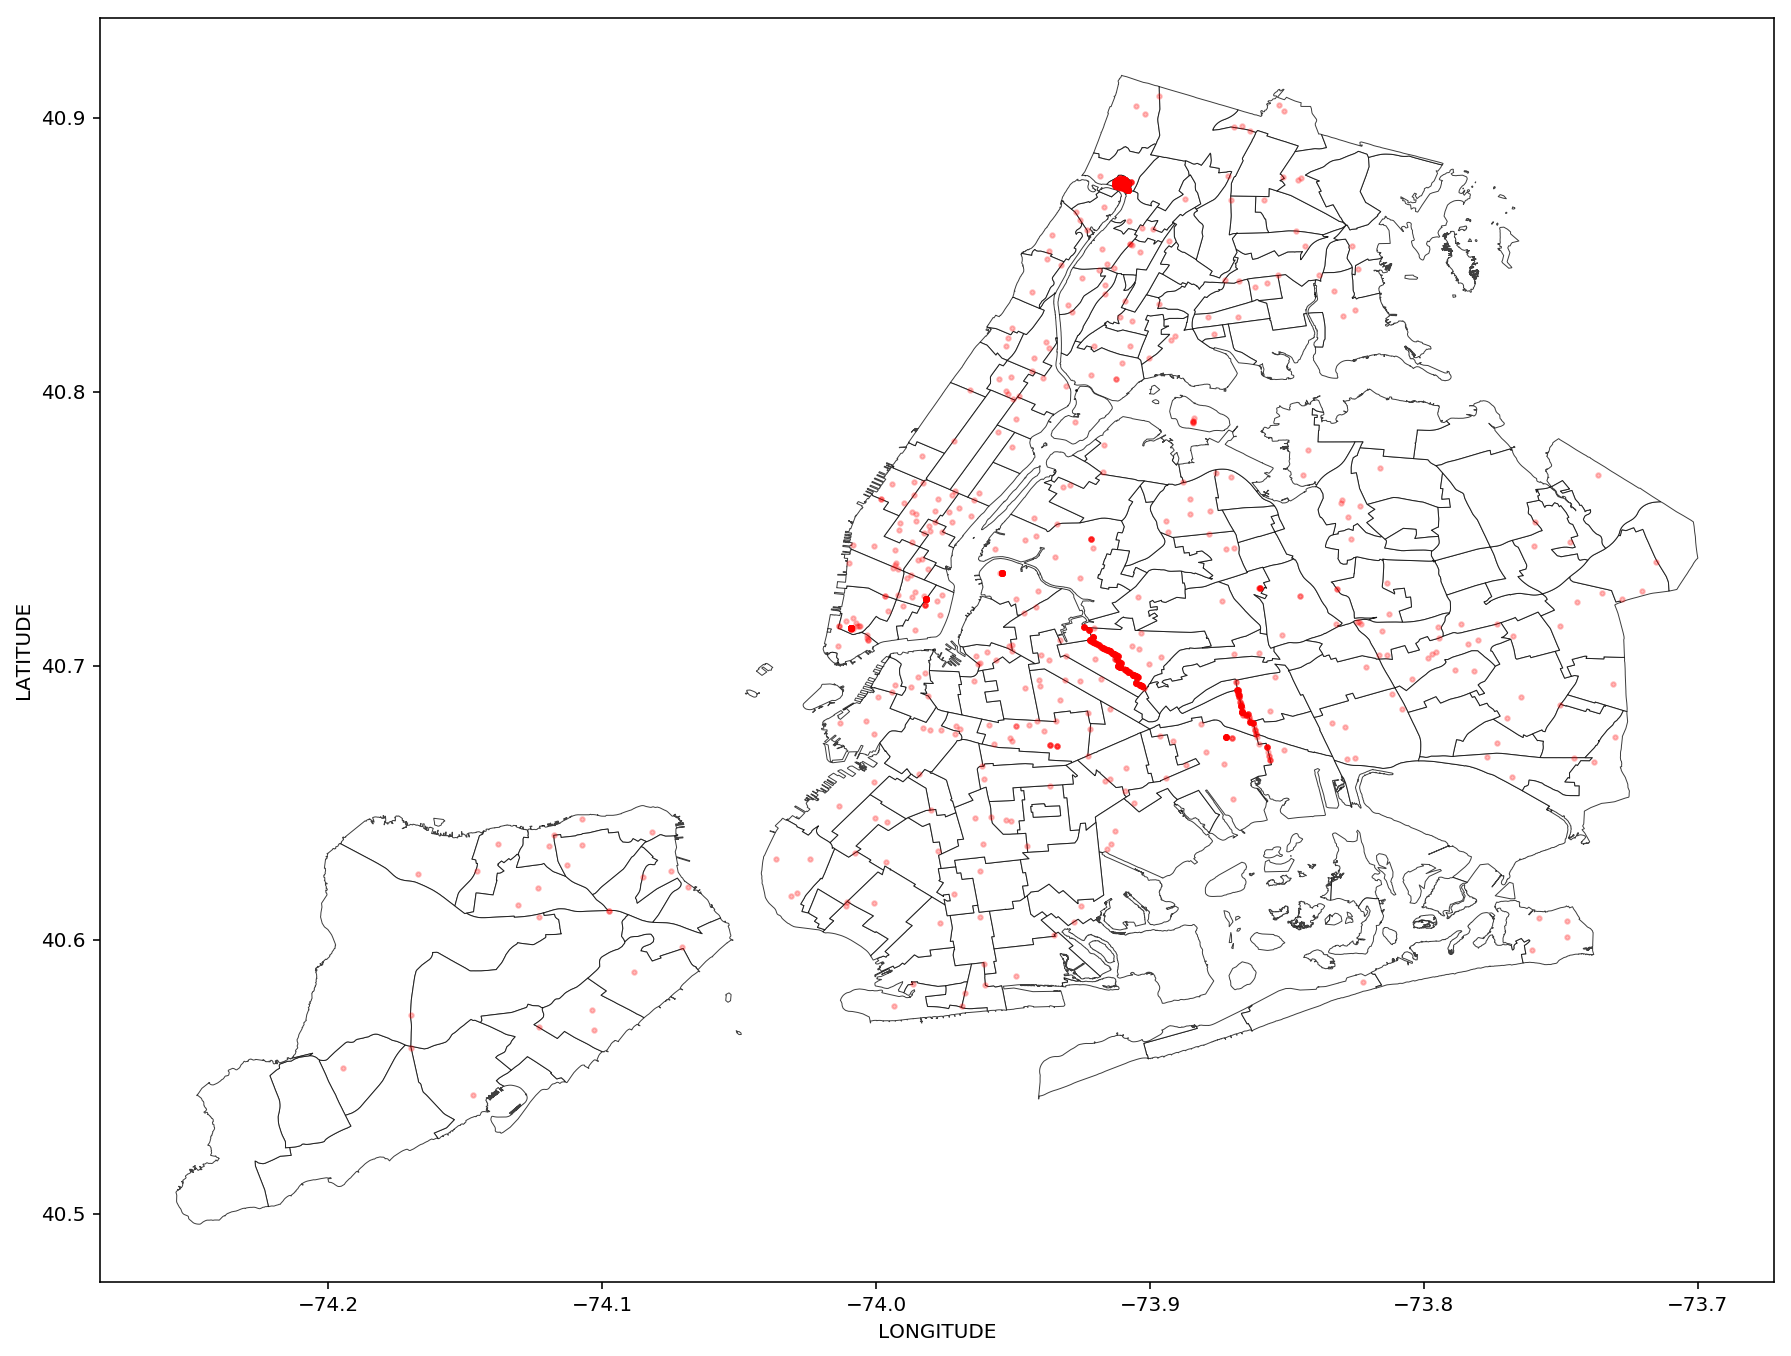

In [39]:
# The plot reveals that most are border issues
# but there are random errors spread throughout the city
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 12),
    alpha=0.75)

errors.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=5,
    alpha=0.25, ax=base)

In [40]:
todrop = ['boro_code', 'BOROUGH', 'county_fip', 'ntacode',  'shape_area', 'shape_leng', 'geometry', 
          'DATE', 'TIME', 'LOCATION', 'index_right']

gdf = gdf.drop(todrop, axis='columns')

In [41]:
gdf.columns

Index(['boro_name', 'ntaname', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'DATETIME'],
      dtype='object')

In [42]:
# Rename the columns

gdf = gdf.rename(
    {
        'boro_name': 'BOROUGH',
        'ntaname': 'NEIGHBORHOOD',
        "ZIP CODE": "ZIPCODE",
        "ON STREET NAME": "ON_STREET_NAME",
        "CROSS STREET NAME": "CROSS_STREET_NAME",
        "OFF STREET NAME": "OFF_STREET_NAME",
        "NUMBER OF PERSONS INJURED": "PERSONS_INJURED",
        "NUMBER OF PERSONS KILLED": "PERSONS_KILLED",
        "NUMBER OF PEDESTRIANS INJURED": "PEDESTRIANS_INJURED",
        "NUMBER OF PEDESTRIANS KILLED": "PEDESTRIANS_KILLED",
        'NUMBER OF MOTORIST INJURED': 'MOTORISTS_INJURED',
        'NUMBER OF MOTORIST KILLED': 'MOTORISTS_INJURED', 
        'NUMBER OF CYCLIST INJURED': 'CYCLISTS_INJURED', 
        'NUMBER OF CYCLIST KILLED': 'CYCLISTS_KILLED',
        'CONTRIBUTING FACTOR VEHICLE 1': 'CAUSE_VEHICLE_1',
        'CONTRIBUTING FACTOR VEHICLE 2': 'CAUSE_VEHICLE_2',
        'CONTRIBUTING FACTOR VEHICLE 3': 'CAUSE_VEHICLE_3',
        'CONTRIBUTING FACTOR VEHICLE 4': 'CAUSE_VEHICLE_4',
        'CONTRIBUTING FACTOR VEHICLE 5': 'CAUSE_VEHICLE_5',
        'VEHICLE TYPE CODE 1': 'TYPE_VEHICLE_1',
        'VEHICLE TYPE CODE 2': 'TYPE_VEHICLE_2',
        'VEHICLE TYPE CODE 3': 'TYPE_VEHICLE_3',
        'VEHICLE TYPE CODE 4': 'TYPE_VEHICLE_4',
        'VEHICLE TYPE CODE 5': 'TYPE_VEHICLE_5',
        'UNIQUE KEY': "UNIQUE_KEY"
    },
    axis = 'columns'
)

In [43]:
# Reorder the columns

columns = [
    'UNIQUE_KEY', 'DATETIME', 'LATITUDE', 'LONGITUDE', 'ON_STREET_NAME',
    'CROSS_STREET_NAME', 'OFF_STREET_NAME', 'ZIPCODE', 'NEIGHBORHOOD',
    'BOROUGH', 'PERSONS_INJURED', 'PERSONS_KILLED', 'PEDESTRIANS_INJURED',
    'PEDESTRIANS_KILLED', 'CYCLISTS_INJURED', 'CYCLISTS_KILLED',
    'MOTORISTS_INJURED', 'MOTORISTS_INJURED', 'CAUSE_VEHICLE_1',
    'CAUSE_VEHICLE_2', 'CAUSE_VEHICLE_3', 'CAUSE_VEHICLE_4', 'CAUSE_VEHICLE_5',
    'TYPE_VEHICLE_1', 'TYPE_VEHICLE_2', 'TYPE_VEHICLE_3', 'TYPE_VEHICLE_4',
    'TYPE_VEHICLE_5'
]

gdf = gdf[columns]

In [44]:
# Sort by date
gdf = gdf.sort_values('DATETIME')

In [45]:
final_df = pd.DataFrame(gdf)

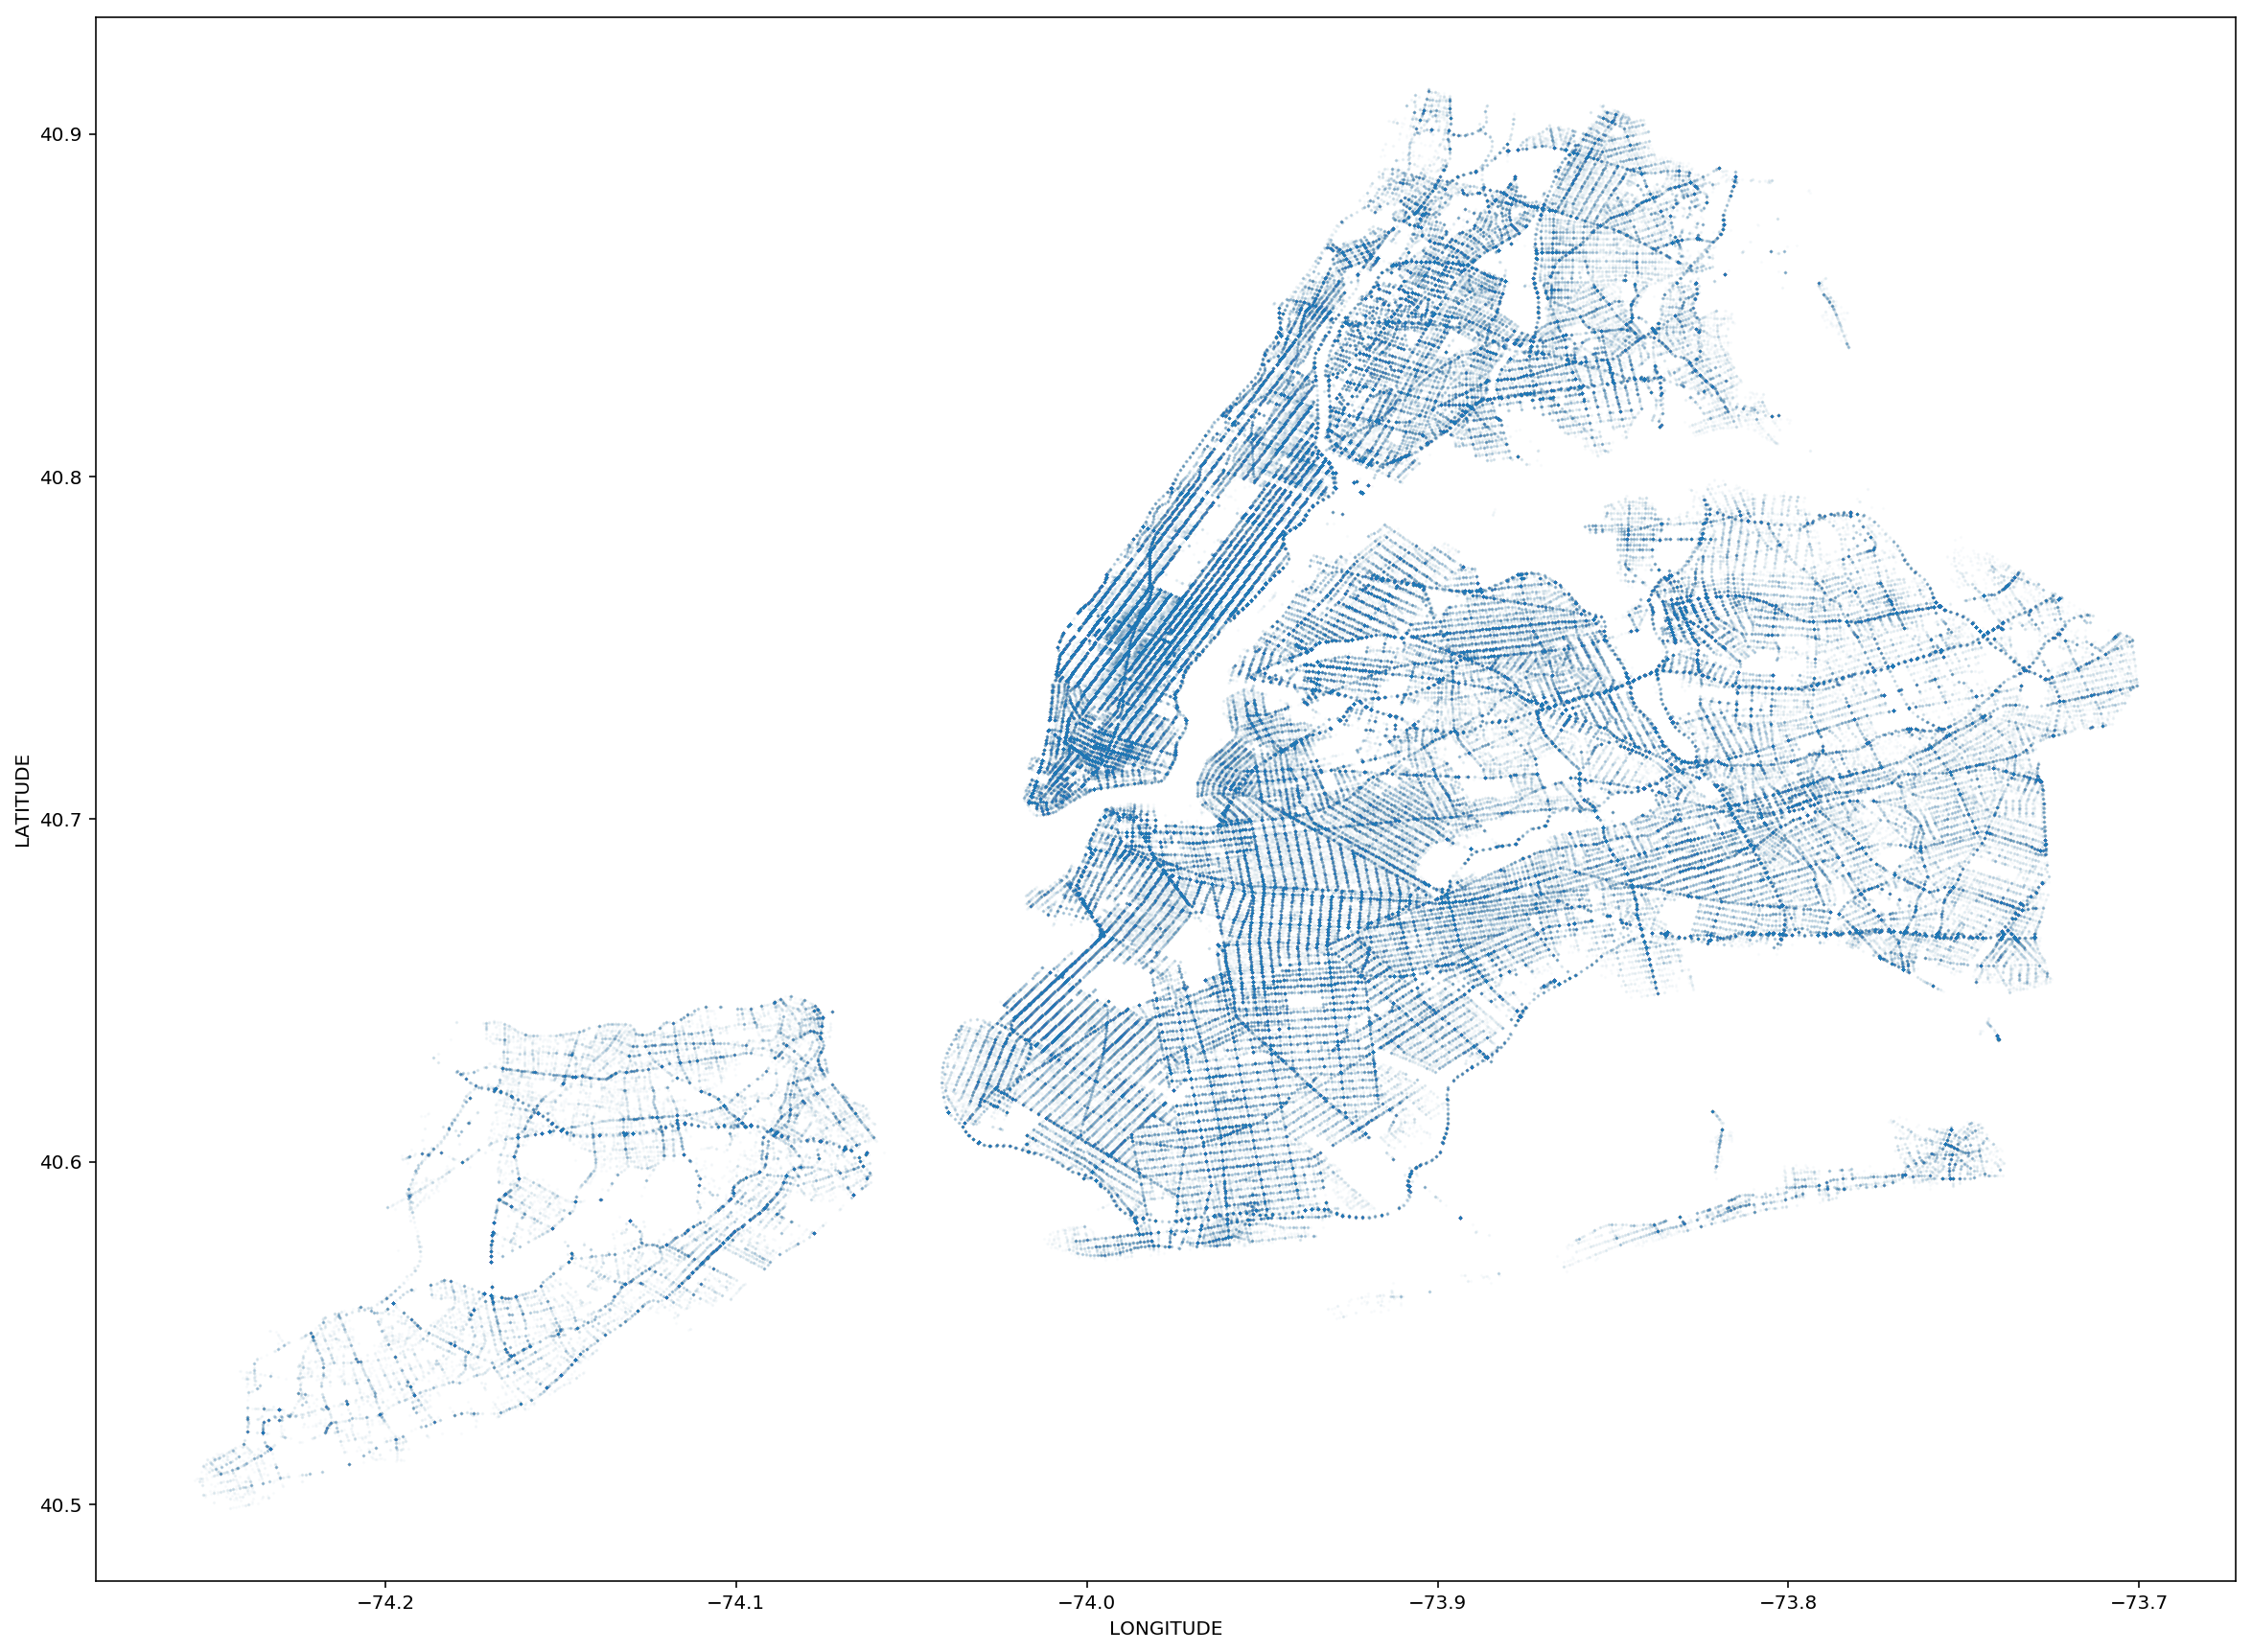

In [46]:
final_df.plot.scatter(x='LONGITUDE', y='LATITUDE',figsize=(20,15), s=0.5, alpha=0.02)

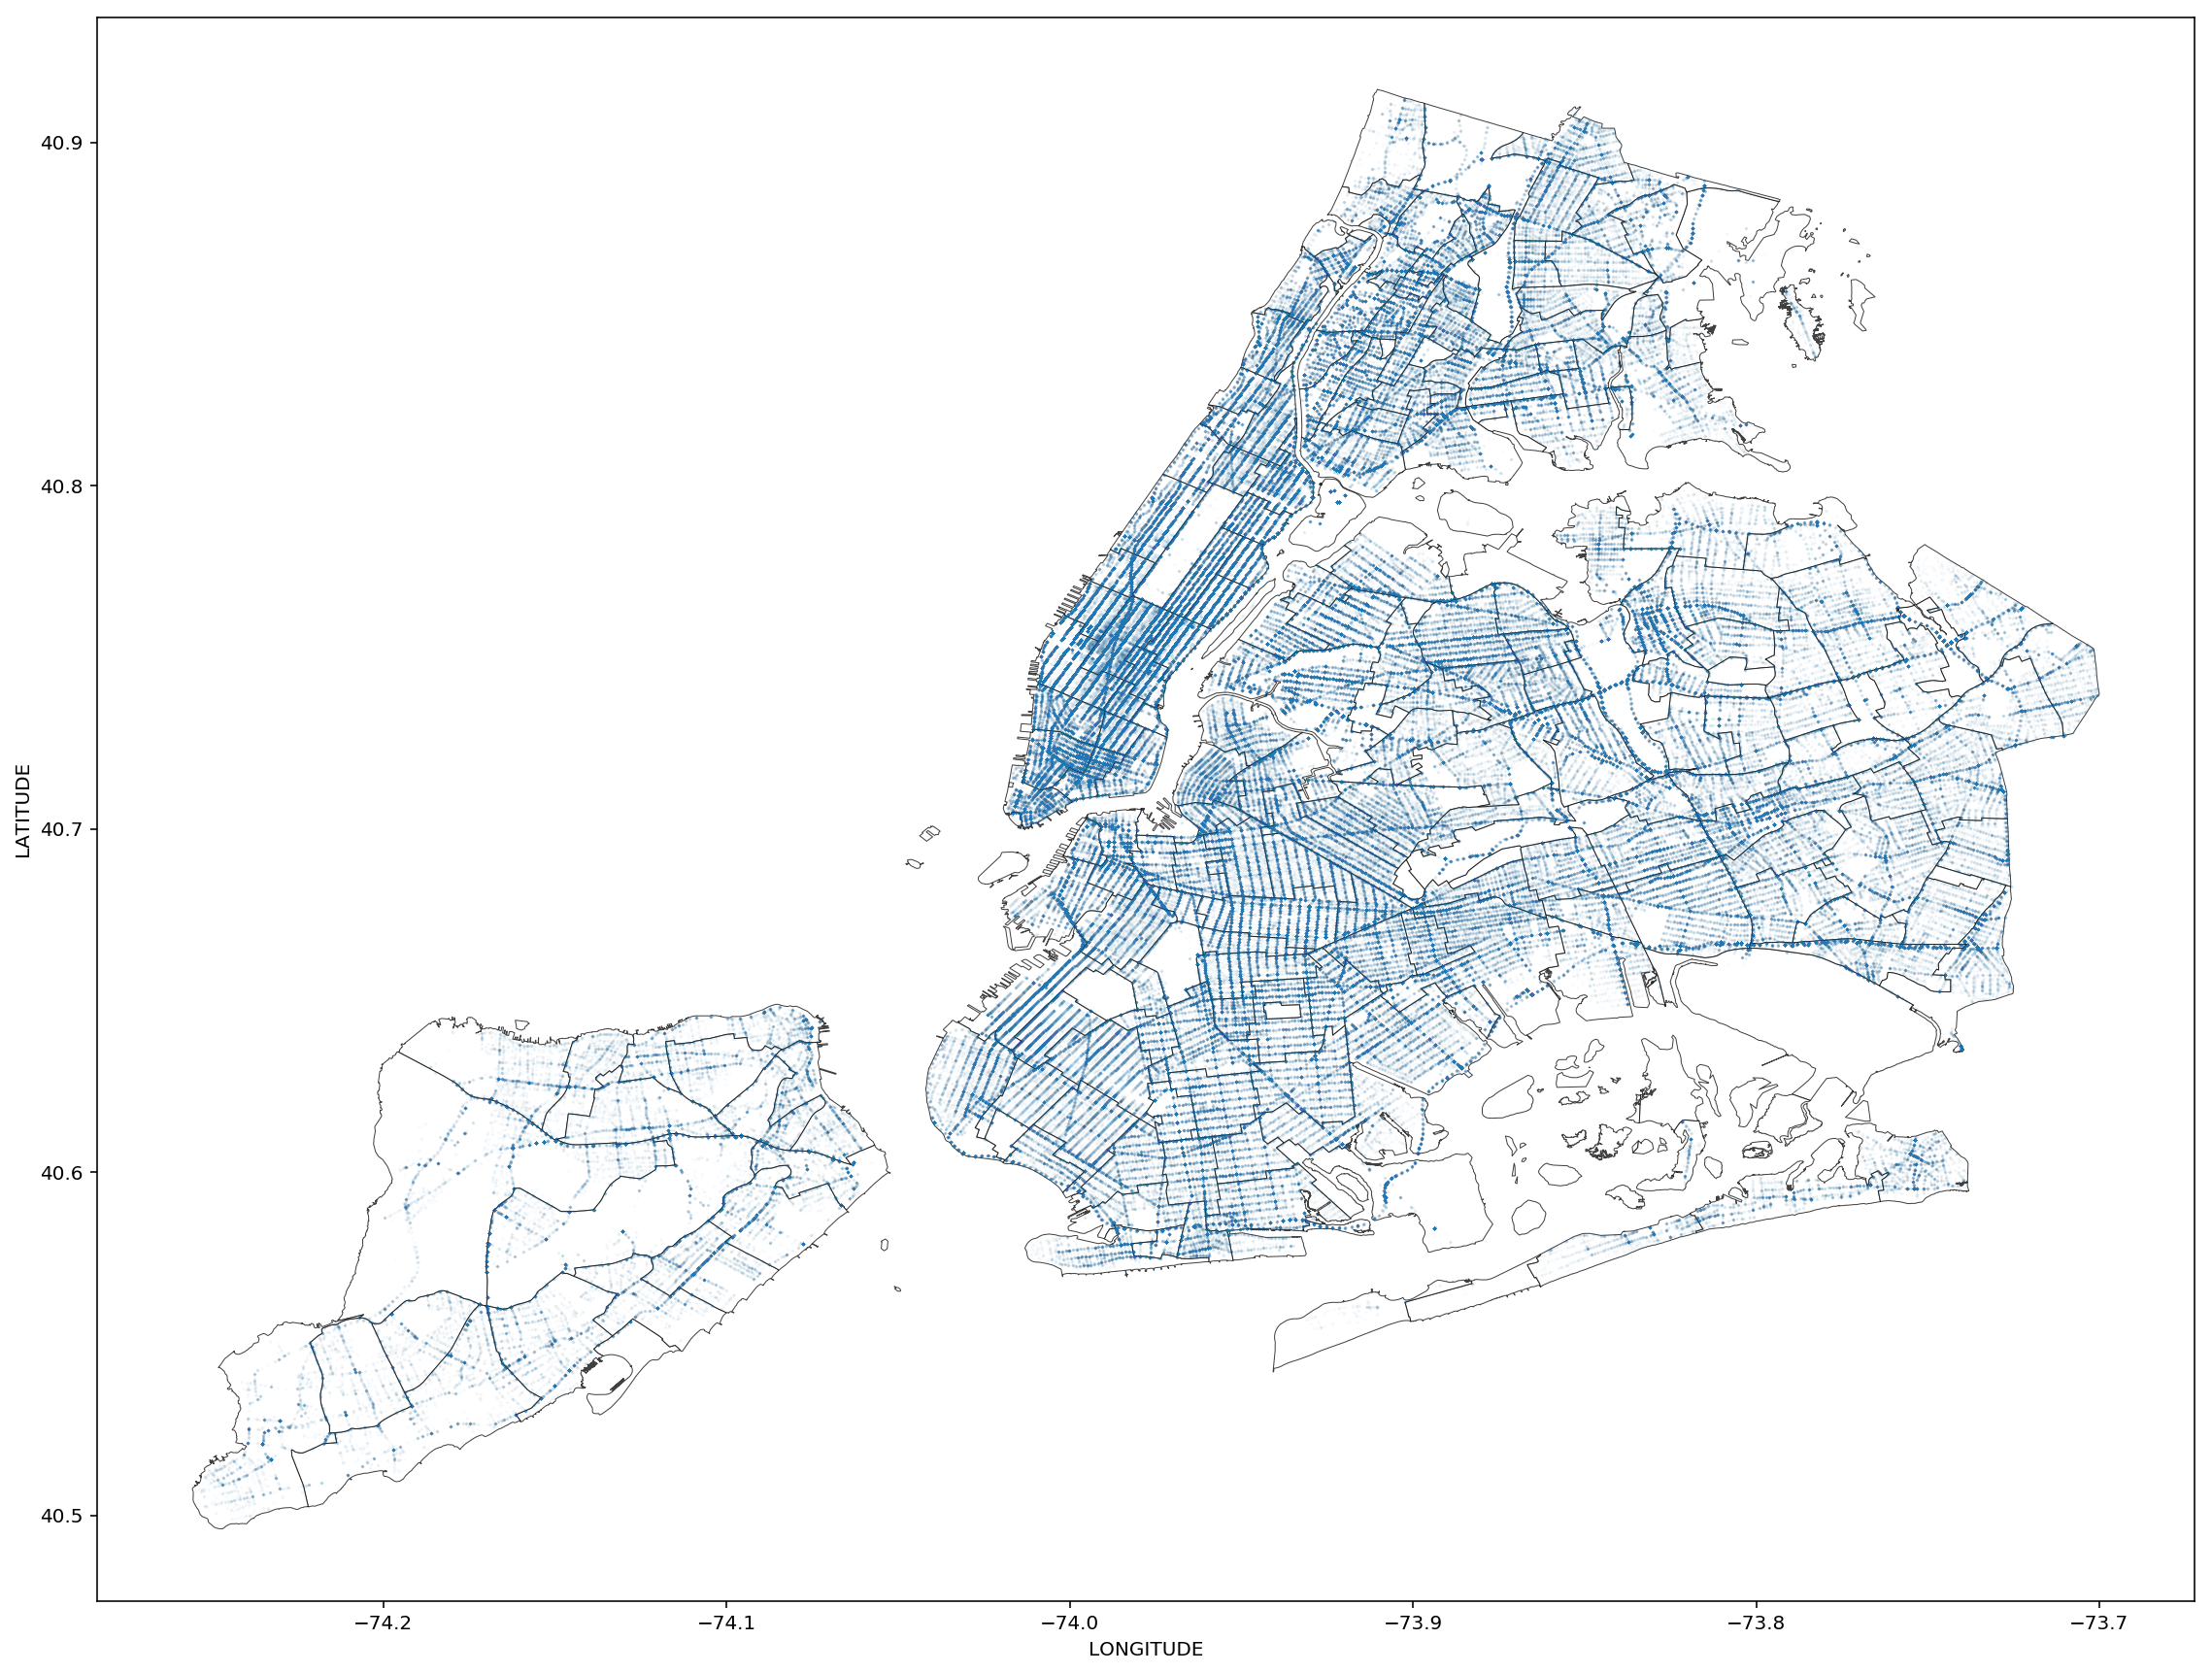

In [47]:
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(20, 15),
    alpha=0.75)

scatterplot = final_df.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    s=0.5,
    alpha=0.02,
    ax=base)

In [48]:
final_df.to_csv('collisions.csv.gz', index=False, compression='gzip')

## TODO

* Examine the contents of Contributing factor and Vehicle type. Replace noisy values with UNSPECIFIED
* 
* Normalize Contributing factor and Vehicle type, and split results in a separate table. Create MySQL/SQLite database with proper normalization.

* Add a column "NUM_VEHICLES" to show the number of vehicles involved in the accident. Check that we do not have NaNs before a real value in CAUSE and in VEHICLE TYPE, and that the two columns (CAUSE AND VEHICLE) agree in the number.

In [69]:
fdf = final_df.set_index("UNIQUE_KEY")

In [70]:
cols = [fdf.CAUSE_VEHICLE_1, fdf.CAUSE_VEHICLE_2, fdf.CAUSE_VEHICLE_3, fdf.CAUSE_VEHICLE_4, fdf.CAUSE_VEHICLE_5]
causes = pd.concat( cols ).dropna()

In [71]:
# We replace noisy causes with UNSPECIFIED and not with NaN, as NaN is used to mean "no vehicle"
import numpy as np
causes = causes.replace(to_replace='1', value='UNSPECIFIED')
causes = causes.replace(to_replace='80', value='UNSPECIFIED')
causes = causes.replace(to_replace='ILLNES', value='ILLNESS')

In [73]:
causes.value_counts()#.sort_index()

UNSPECIFIED                                              1501179
DRIVER INATTENTION/DISTRACTION                            286943
FAILURE TO YIELD RIGHT-OF-WAY                              84231
FOLLOWING TOO CLOSELY                                      66278
OTHER VEHICULAR                                            64425
BACKING UNSAFELY                                           54858
FATIGUED/DROWSY                                            46243
TURNING IMPROPERLY                                         38065
PASSING OR LANE USAGE IMPROPER                             34882
PASSING TOO CLOSELY                                        31384
UNSAFE LANE CHANGING                                       25938
TRAFFIC CONTROL DISREGARDED                                23561
DRIVER INEXPERIENCE                                        23228
LOST CONSCIOUSNESS                                         20912
PAVEMENT SLIPPERY                                          16007
PRESCRIPTION MEDICATION  

In [74]:
cols = [fdf.TYPE_VEHICLE_1, fdf.TYPE_VEHICLE_2, fdf.TYPE_VEHICLE_3, fdf.TYPE_VEHICLE_4, fdf.TYPE_VEHICLE_5]

# cols = [fdf.TYPE_VEHICLE_4] # , fdf.TYPE_VEHICLE_2, fdf.TYPE_VEHICLE_3, fdf.TYPE_VEHICLE_4, fdf.TYPE_VEHICLE_5]

types = pd.concat( cols ).dropna()

In [112]:
types = types.replace(to_replace='STATION WAGON/SPORT UTILITY VEHICLE', value='SPORT UTILITY / STATION WAGON')
types = types.replace(to_replace='WAGON', value='SPORT UTILITY / STATION WAGON')
types = types.replace(to_replace='BU', value='BUS')
types = types.replace(to_replace='CONV', value='CONVERTIBLE')

types = types.replace(to_replace='VAN CAMPER', value='VAN')
types = types.replace(to_replace='VAN T', value='VAN')
types = types.replace(to_replace='VAN F', value='VAN')
types = types.replace(to_replace='VAN A', value='VAN')
types = types.replace(to_replace='VAN W', value='VAN')
types = types.replace(to_replace='VAN/B', value='VAN')
types = types.replace(to_replace='VAB', value='VAN')
types = types.replace(to_replace='VAN C', value='VAN')
types = types.replace(to_replace='VAN/T', value='VAN')
types = types.replace(to_replace='VANETTE', value='VAN')
types = types.replace(to_replace='VAN`', value='VAN')
types = types.replace(to_replace='VAV', value='VAN')
types = types.replace(to_replace='VN', value='VAN')

types = types.replace(to_replace='AM', value='AMBULANCE')
types = types.replace(to_replace='AMB', value='AMBULANCE')
types = types.replace(to_replace='AMBU', value='AMBULANCE')
types = types.replace(to_replace='AMBUL', value='AMBULANCE')
types = types.replace(to_replace='ANBUL', value='AMBULANCE')
types = types.replace(to_replace='AMABU', value='AMBULANCE')
types = types.replace(to_replace='AMULA', value='AMBULANCE')
types = types.replace(to_replace='ABULA', value='AMBULANCE')

types = types.replace(to_replace='BICYC', value='BICYCLE')
types = types.replace(to_replace='BIKE', value='BICYCLE')

types = types.replace(to_replace='TANK', value='TANKER')
types = types.replace(to_replace='TANKE', value='TANKER')

types = types.replace(to_replace='UNK', value='UNKNOWN')
types = types.replace(to_replace='UNK,', value='UNKNOWN')
types = types.replace(to_replace='UNKN', value='UNKNOWN')
types = types.replace(to_replace='UNKNO', value='UNKNOWN')
types = types.replace(to_replace='UNKNOWN', value='UNKNOWN')
types = types.replace(to_replace='UNKOW', value='UNKNOWN')
types = types.replace(to_replace='UNNKO', value='UNKNOWN')

types = types.replace(to_replace='SCOO', value='SCOOTER')
types = types.replace(to_replace='SCOOT', value='SCOOTER')

types = types.replace(to_replace='US PO', value='USPS')
types = types.replace(to_replace='USPOS', value='USPS')
types = types.replace(to_replace='USPS2', value='USPS')
types = types.replace(to_replace='USPST', value='USPS')
types = types.replace(to_replace='U.S P', value='USPS')
types = types.replace(to_replace='U.S.', value='USPS')


In [113]:
sorted(types.value_counts().index.values)

['(CEME',
 '00',
 '013',
 '1',
 '12 PA',
 '15 PA',
 '18 WH',
 '1S',
 '2 DOO',
 '2 DR SEDAN',
 '2 TON',
 '2 WHE',
 '2- TO',
 '2TON',
 '3 WHE',
 '3-DOOR',
 '3-WHE',
 '315 E',
 '38AB-',
 '3D',
 '3DC-',
 '4 DR SEDAN',
 '4 RUN',
 '4D',
 '4DR',
 '4DS',
 '4DSD',
 '4WHEE',
 '985',
 '994',
 'ACCES',
 'AMBULANCE',
 'APORT',
 'APPOR',
 'AR',
 'ARMOR',
 'ARMORED TRUCK',
 'ARMY',
 'B5-44',
 'BA',
 'BACK',
 'BACKH',
 'BED',
 'BED T',
 'BEVERAGE TRUCK',
 'BICYCLE',
 'BK',
 'BLOCK',
 'BLUE',
 'BOAT',
 'BOB C',
 'BOBCA',
 'BOOM',
 'BOOML',
 'BOX',
 'BOX T',
 'BOX TRUCK',
 'BOXTR',
 'BR',
 'BROOM',
 'BS',
 'BSD',
 'BUCKE',
 'BUDGE',
 'BULK AGRICULTURE',
 'BULLD',
 'BUS',
 'C-1',
 'C0MME',
 'CAB',
 'CABIN',
 'CAMP',
 'CAMPE',
 'CAR C',
 'CARGO',
 'CARRI',
 'CARRY ALL',
 'CART',
 'CASE',
 'CAT',
 'CAT 3',
 'CAT 4',
 'CAT 9',
 'CAT P',
 'CATE',
 'CATER',
 'CB',
 'CB534',
 'CEMEN',
 'CHART',
 'CHASSIS CAB',
 'CHERR',
 'CHEVO',
 'CHEVR',
 'CHEVY',
 'CITY',
 'CM',
 'CMIX',
 'CMS-T',
 'CO',
 'COM',
 'COM T',
 

In [114]:
types.value_counts()[ types.value_counts() > 50 ] 

PASSENGER VEHICLE                 1139164
SPORT UTILITY / STATION WAGON      649752
SEDAN                              153590
TAXI                               106449
UNKNOWN                             90326
PICK-UP TRUCK                       53576
VAN                                 50316
OTHER                               42830
BICYCLE                             36820
BUS                                 34032
SMALL COM VEH(4 TIRES)              26343
LARGE COM VEH(6 OR MORE TIRES)      22822
LIVERY VEHICLE                      16774
MOTORCYCLE                          13248
BOX TRUCK                            9677
AMBULANCE                            5053
TK                                   4932
TRACTOR TRUCK DIESEL                 3947
CONVERTIBLE                          1925
DS                                   1866
DUMP                                 1430
FIRE TRUCK                           1344
4 DR SEDAN                           1181
PK                                

In [68]:
# 4050018: Panos :-)
final_df.set_index('UNIQUE_KEY').loc['4050018']

DATETIME                                      2018-12-21 20:10:00
LATITUDE                                                  40.7428
LONGITUDE                                                -74.0077
ON_STREET_NAME                   10 AVENUE                       
CROSS_STREET_NAME                                  WEST 15 STREET
OFF_STREET_NAME                                               NaN
ZIPCODE                                                     10011
NEIGHBORHOOD           Hudson Yards-Chelsea-Flatiron-Union Square
BOROUGH                                                 Manhattan
PERSONS_INJURED                                                 0
PERSONS_KILLED                                                  0
PEDESTRIANS_INJURED                                             0
PEDESTRIANS_KILLED                                              0
CYCLISTS_INJURED                                                0
CYCLISTS_KILLED                                                 0
MOTORISTS_